**Analyse et segmentation de clientèle d'un magasin avec campagnes de marketing**
_Jules EXBRAYAT & Abdenour MADANI_

# Présentation

## Problématique

Quel est le client type de l'entreprise ?

Peut-on créer des groupes de clients, afin de cibler efficacement les potentiels clients et personnaliser la campagne marketing ?

## Jeu de données

In [ ]:
# todo : ajouter une description / une partie pour parler du jeu de données
# "Ce jeu de données contient le profil de plusieurs clients d'une enseigne de grande distribution" \
# "Il contient les données de juillet 2012 à juillet 2014" \
# "Nous disposons des ventes en Vin, etc"

### Lecture des données

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
np.random.seed(0)
sns.set_theme()

In [ ]:
df = pd.read_csv(
    "data/marketing_campaign.csv", sep="\t", index_col="ID", parse_dates=True
)

### Présentation des variables

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 28 variables et 2240 individus.


#### Variables

- ID: identifiant du client
- Year_Birth: numérique, année de naissance du client
- Education: qualitative, niveau d'éducation
- Marital_Status: qualitative, statut marital
- Income: numérique, revenu annuel en $
- Kidhome: numérique, nombre d'enfants en bas-âge
- Teenhome: numérique, nombre d'enfants adolescents
- Dt_Customer: date, date à laquelle le client s'est inscrit
- Recency: numérique, nombre de jours depuis le dernier achat
- Complain: catégorique, est-ce que le client s'est plaint les 2 dernières années (0 ou 1)

#### Products

- MntWines: numérique, argent dépensé les 2 dernières années en vin
- MntFruits: numérique, argent dépensé les 2 dernières années en fruits
- MntMeatProducts: numérique, argent dépensé les 2 dernières années en viande
- MntFishProducts: numérique, argent dépensé les 2 dernières années en poisson
- MntSweetProducts: numérique, argent dépensé les 2 dernières années en bonbons / gâteaux
- MntGoldProds: numérique, argent dépensé les 2 dernières années en bijoux / or

#### Promotion

- NumDealsPurchases: numérique, nombre d'achats effectués avec une promotion
- AcceptedCmp1: catégorique, le client a-t-il acheté durant la campagne promotionnelle numéro 1 (1 s'il a acheté, 0 sinon)
- AcceptedCmp2: pareil pour la campagne numéro 2
- AcceptedCmp3: pareil pour la campagne numéro 3
- AcceptedCmp4: pareil pour la campagne numéro 4
- AcceptedCmp5: pareil pour la campagne numéro 5
- Response: catégorique, 1 si le client a acheté durant la dernière campagne, 0 sinon (potentielle variable à prédire)

#### Place

- NumWebPurchases: numérique, nombre d'achats effectués sur le site Internet
- NumCatalogPurchases: numérique, nombre d'achats effectués via le catalogue
- NumStorePurchases: numérique, nombre d'achats effectués en magasin
- NumWebVisitsMonth: numérique, nombre de visites sur le site Internet le dernier mois


Nous séparons les variables numériques des variables catégoriques pour plus de commodités.

In [ ]:
var_numeriques = [
    "Year_Birth",
    "Income",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
]

In [ ]:
var_categoriques = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "Complain",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

Nous convertissons les variables catégoriques en type `category`. (Nous les convertissons au préalable en type `string` car cela facilite l'affichage de la légende avec Matplotlib et Seaborn)

In [ ]:
df[var_categoriques] = df[var_categoriques].astype(str).astype("category")

In [ ]:
# todo: convertir en int la variable Income (qui est float)

Nous convertissons les variables au format date.

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   category      
 2   Marital_Status       2240 non-null   category      
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   category      
 5   Teenhome             2240 non-null   category      
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-

Nous avons 11 variables catégoriques, 16 variables quantitatives (dont 15 entières) ainsi qu'une variable de type date.

In [ ]:
# todo: inclure "Découverte" et "Nettoyage" dans une grande partie "Analyse exploratoire des données" ?

# Découverte des données

## Analyse univariée

In [ ]:
df[var_numeriques].describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [ ]:
df[var_categoriques].describe()

,Education,Marital_Status,Kidhome,Teenhome,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,5,8,3,3,2,2,2,2,2,2,2
top,Graduation,Married,0,0,0,0,0,0,0,0,0
freq,1127,864,1293,1158,2219,2096,2210,2077,2073,2077,1906


In [ ]:
# todo: commenter

## Visualisation

### Variables numériques

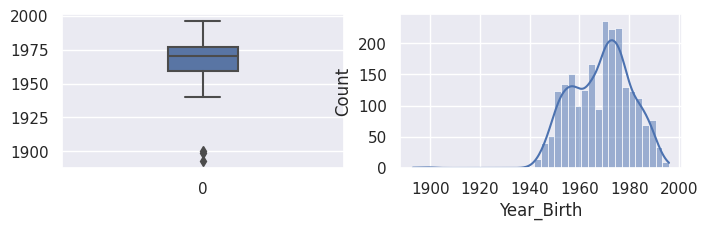

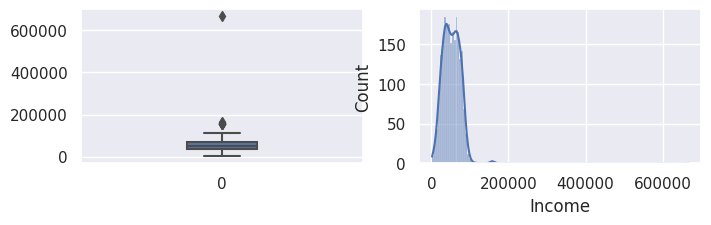

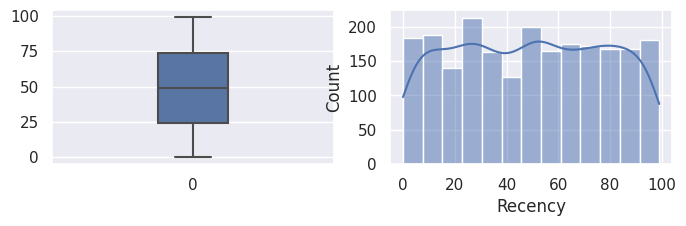

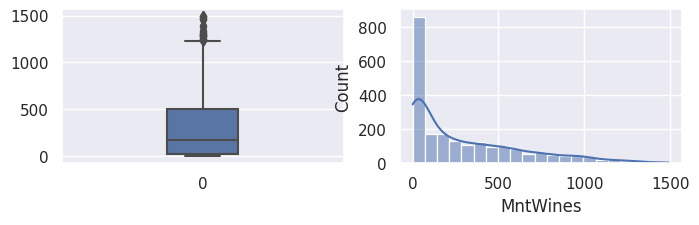

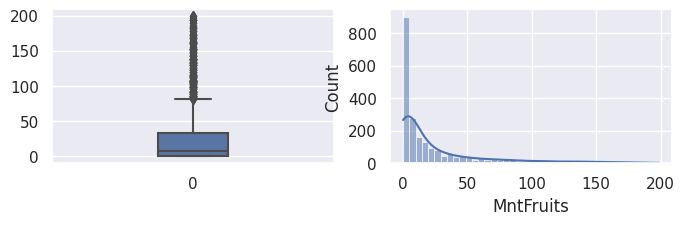

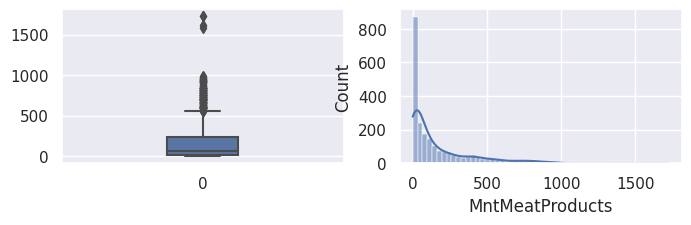

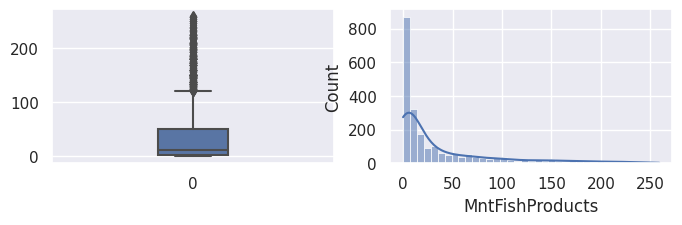

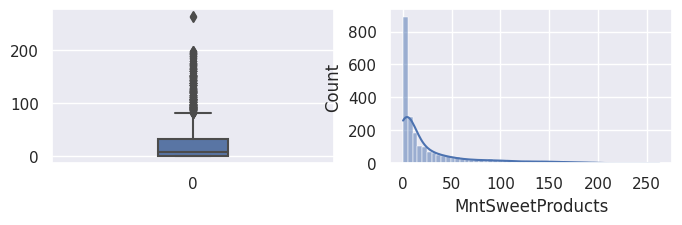

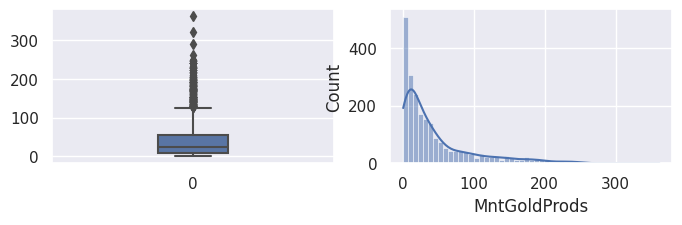

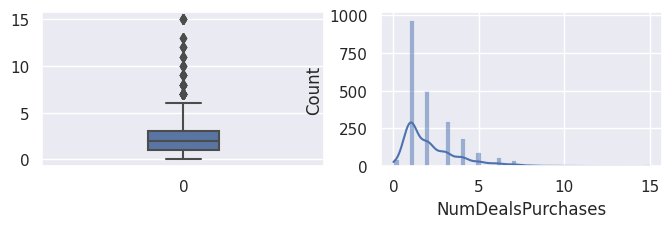

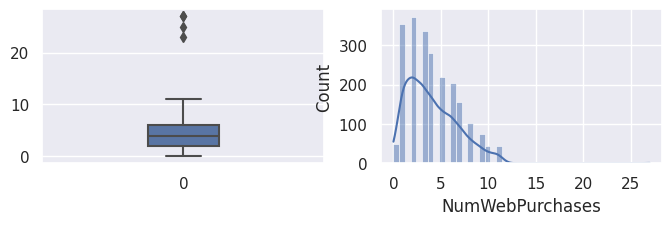

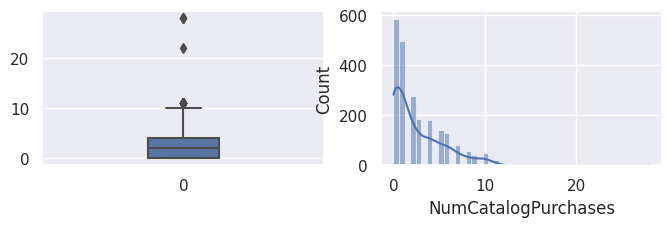

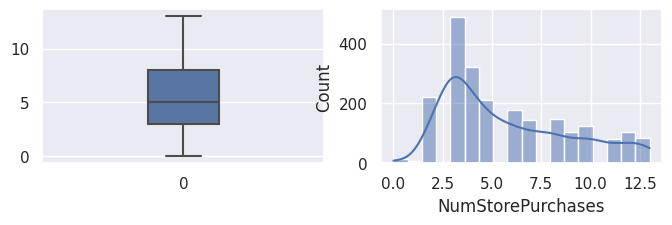

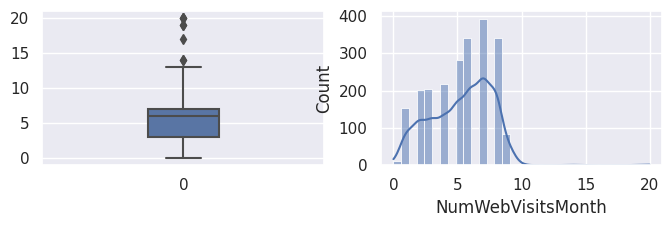

In [ ]:
for var in var_numeriques:
    _, ax = plt.subplots(1, 2, figsize=(8, 2))
    sns.boxplot(df[var], width=0.25, ax=ax[0])
    sns.histplot(df[var], kde=True, ax=ax[1])
    plt.show()

In [ ]:
# todo: commenter les distributions et boxplots

<Axes: >

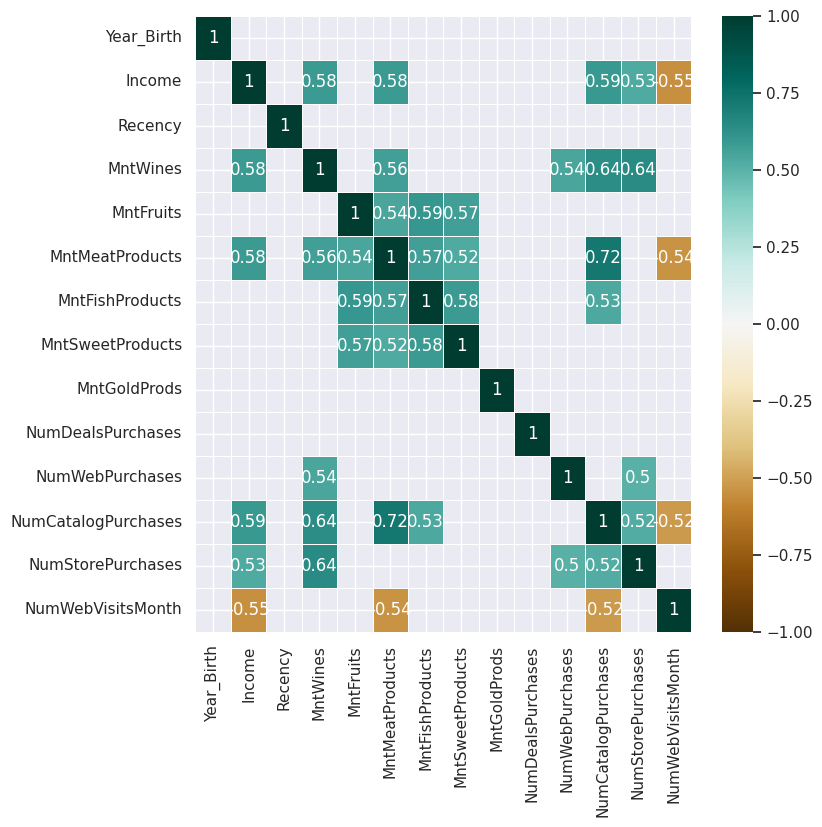

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    df[var_numeriques].corr()[df[var_numeriques].corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

In [ ]:
# todo: commenter la matrice de corrélation

<Axes: title={'center': 'Valeurs manquantes'}, ylabel='ID'>

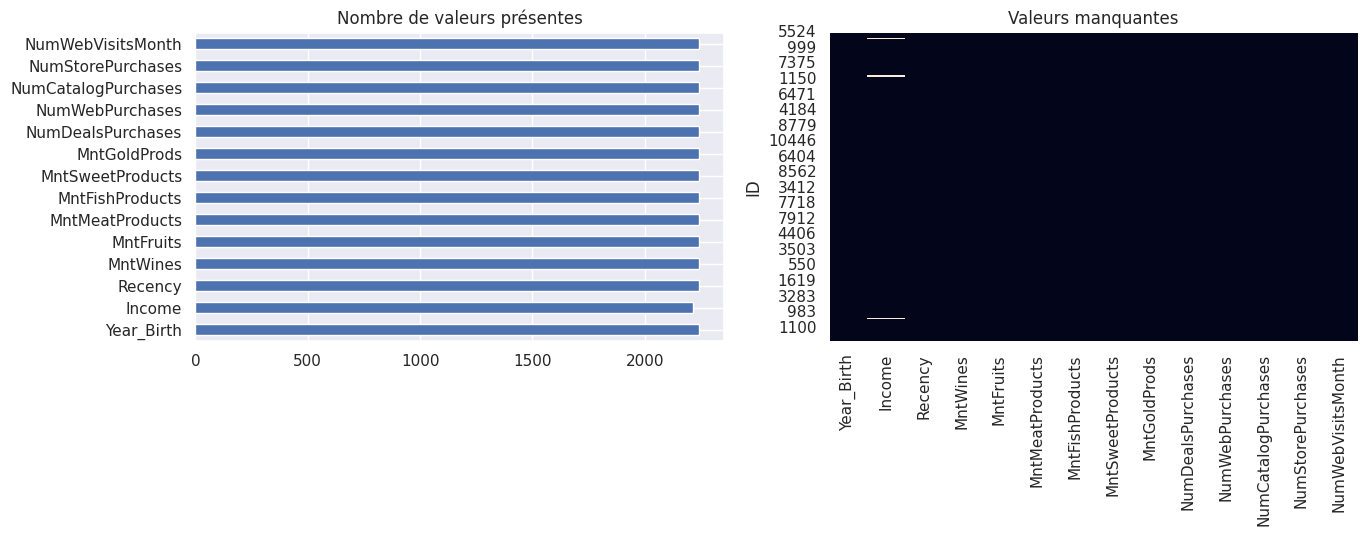

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs présentes")
df.notna().sum()[var_numeriques].plot.barh(ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df[var_numeriques].isna(), cbar=False, ax=ax[1])

Nous observons qu'il n'y a quasiment pas de valeurs manquantes parmi les variables numériques.

### Variables catégoriques

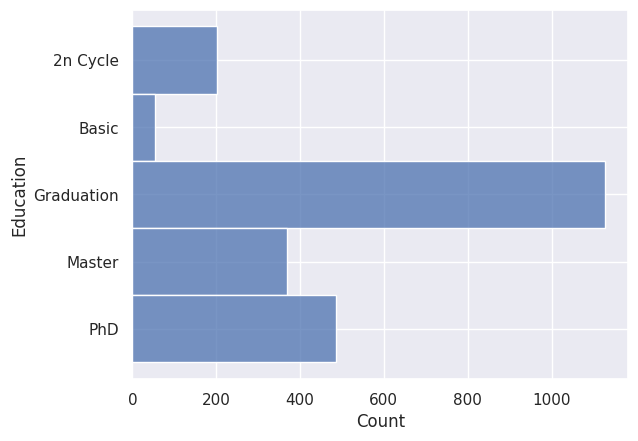

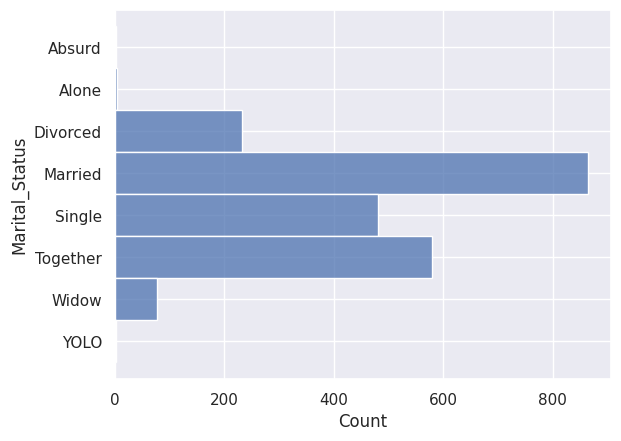

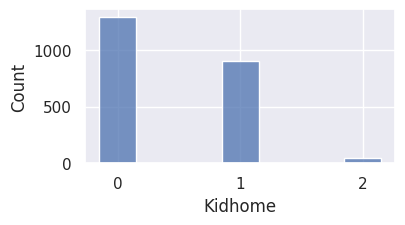

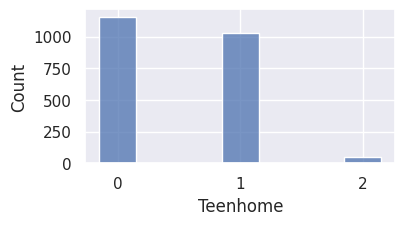

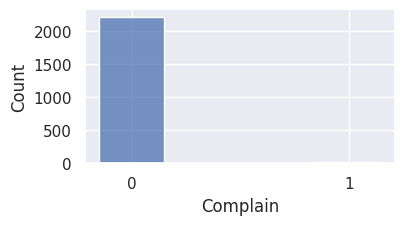

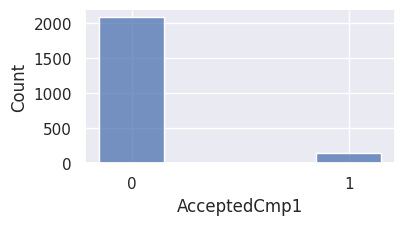

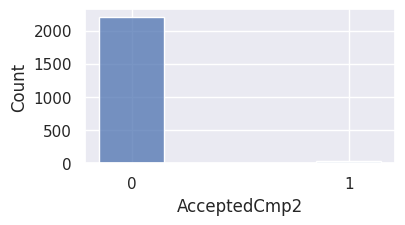

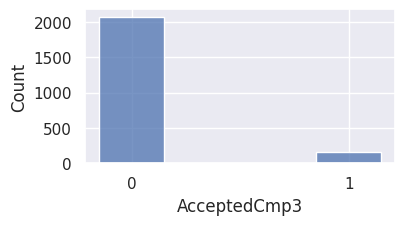

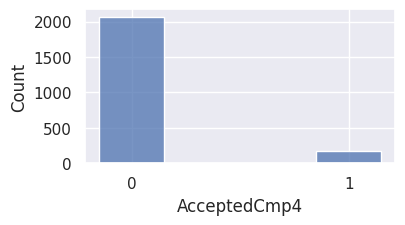

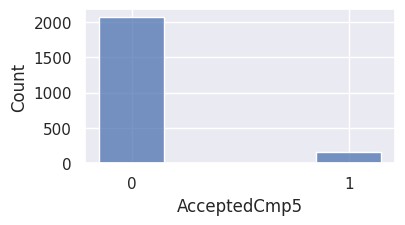

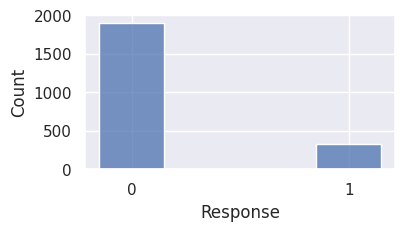

In [ ]:
for var in var_categoriques:
    if df[var].nunique() > 3:
        sns.histplot(y=df[var])
    else:
        plt.figure(figsize=(4, 2))
        sns.histplot(df[var], shrink=0.3)
    plt.show()

<Axes: xlabel='Education,Marital_Status'>

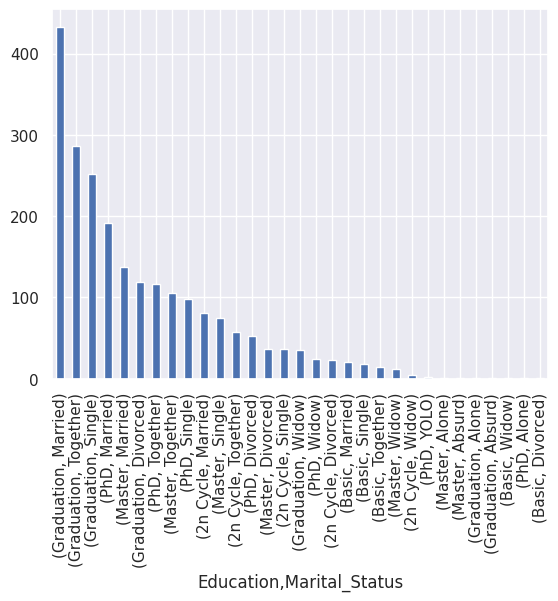

In [ ]:
df[
    df[var_categoriques].columns[df[var_categoriques].nunique() > 3]
].value_counts().plot(kind="bar")

In [ ]:
# todo: commenter

<Axes: title={'center': 'Valeurs manquantes'}, ylabel='ID'>

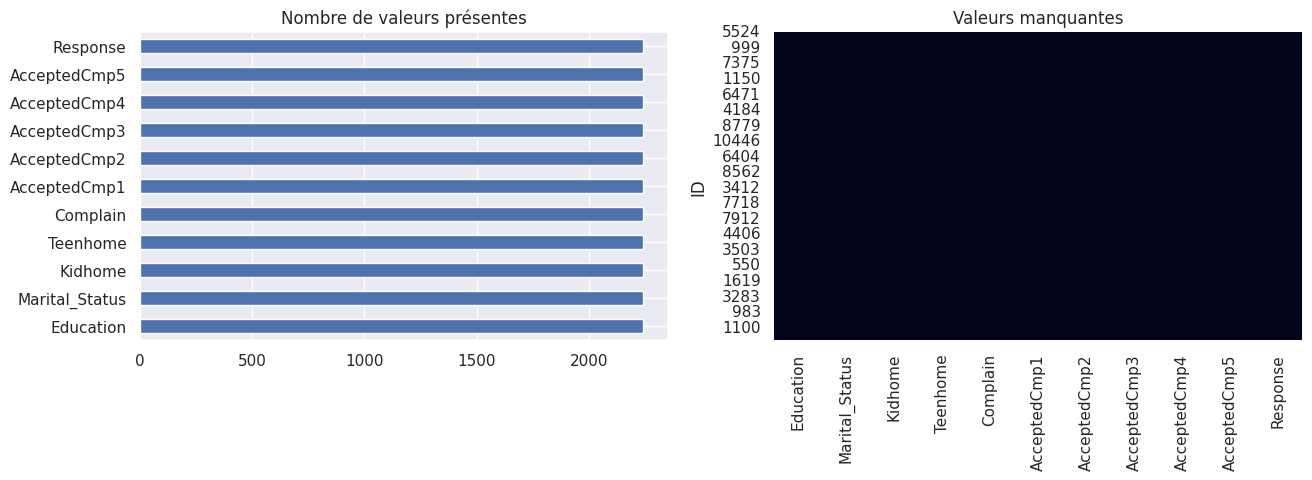

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs présentes")
df.notna().sum()[var_categoriques].plot.barh(ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df[var_categoriques].isna(), cbar=False, ax=ax[1])

Nous observons l'absence de valeurs manquantes parmi les variables catégoriques.

### Dates

In [ ]:
# todo

<Axes: >

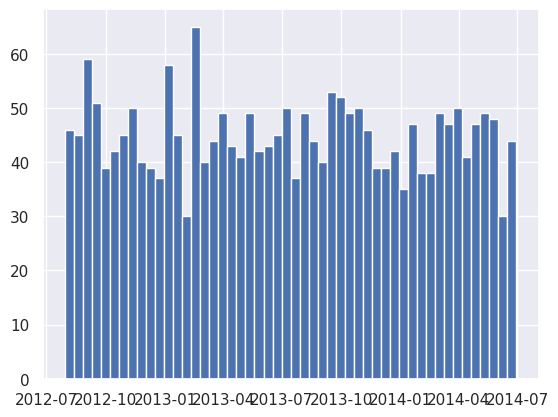

In [ ]:
df["Dt_Customer"].hist(bins=50)

# Nettoyage des données

## Données parasites


### Variables

Dans le jeu de données, 2 colonnes sont non documentées et contiennent des valeurs constantes :
- `Z_CostContact`
- `Z_Revenue`

**Variable `Z_CostContact`**

In [ ]:
print(
    f'Il y a {np.sum(df["Z_CostContact"] == 3)} / {len(df)} individus pour lesquelles la variable Z_CostContact vaut 3.'
)

Il y a 2240 / 2240 individus pour lesquelles la variable Z_CostContact vaut 3.


<Axes: >

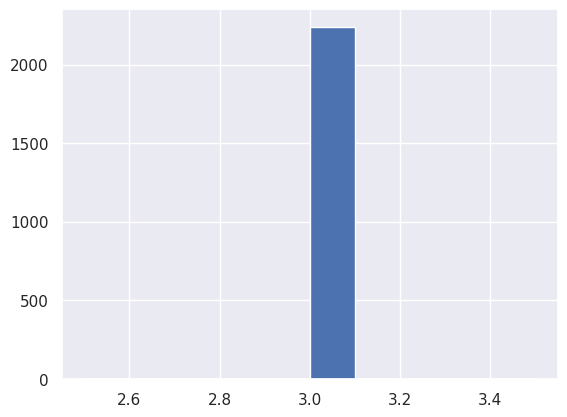

In [ ]:
df["Z_CostContact"].hist()

**Variable `Z_Revenue`**

In [ ]:
print(
    f'Il y a {np.sum(df["Z_Revenue"] == 11)} / {len(df)} individus pour lesquelles la variable Z_Revenue vaut 11.'
)

Il y a 2240 / 2240 individus pour lesquelles la variable Z_Revenue vaut 11.


<Axes: >

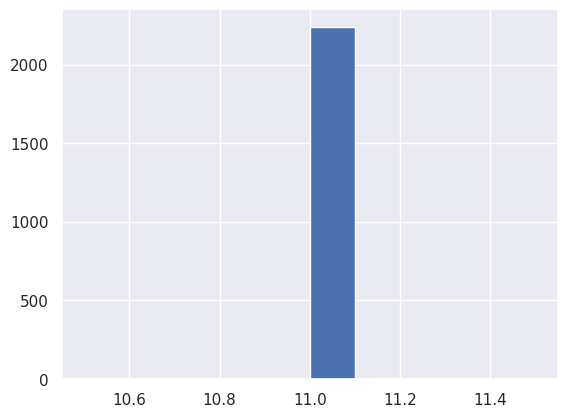

In [ ]:
df["Z_Revenue"].hist()

Nous décidons de les supprimer, car elles sont parasites et ne fournissent pas d'information.

In [ ]:
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

### Valeurs

#### Statut marital

<Axes: xlabel='Count', ylabel='Marital_Status'>

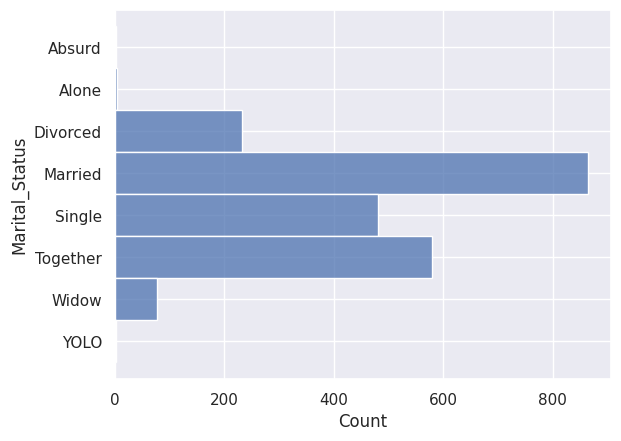

In [ ]:
sns.histplot(y=df["Marital_Status"])

Parmi les situations maritales, on observe "absurde" et "YOLO" (You Only Live Once, _on ne vit qu'une fois_).

Comme on ne peut pas déduire ce que veut dire "absurde" dans ce contexte, on se décide de supprimer l'individu.
De même, on suppose que la personne ayant répondu "YOLO", donc ayant répondu de façon humoristique, doit être supprimée du jeu de données.

In [ ]:
df.drop(index=df.loc[df["Marital_Status"] == "YOLO"].index, inplace=True)
df.drop(index=df.loc[df["Marital_Status"] == "Absurd"].index, inplace=True)

In [ ]:
# On retire les options "YOLO" et "Absurd" de nos variables catégoriques.
df["Marital_Status"] = df["Marital_Status"].cat.remove_categories(["YOLO", "Absurd"])

<Axes: xlabel='Count', ylabel='Marital_Status'>

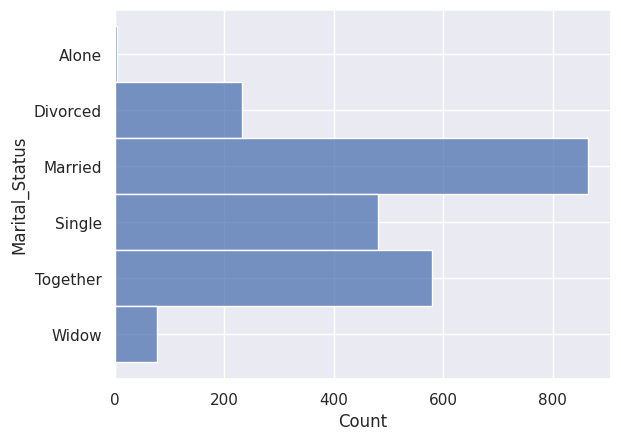

In [ ]:
sns.histplot(y=df["Marital_Status"])

## Données dupliquées

### Individus

In [ ]:
sum(df.duplicated())

182

Nous observons qu'il y a 182 lignes qui sont dupliquées.

Nous pouvons supposer que les données ont été fusionnées à partir de plusieurs sources, et que ces sources avaient des individus en commun : nous décidons donc de supprimer les doublons.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
sum(df.duplicated())

0

## Variables pas assez informatives

In [ ]:
# todo: dire que la variable "Complain" (si le client s'est plaint ou non), n'apporte pas assez d'information pour être gardée, car il y a moins de 1% des observations qui ont une classe autre que "0", et qu'en plus ce n'est pas central à notre étude

In [ ]:
# todo: essayer quand même une visualisation des individus s'étant plaint par rapport à nos variables cibles, au cas où...

<Axes: xlabel='Complain', ylabel='Count'>

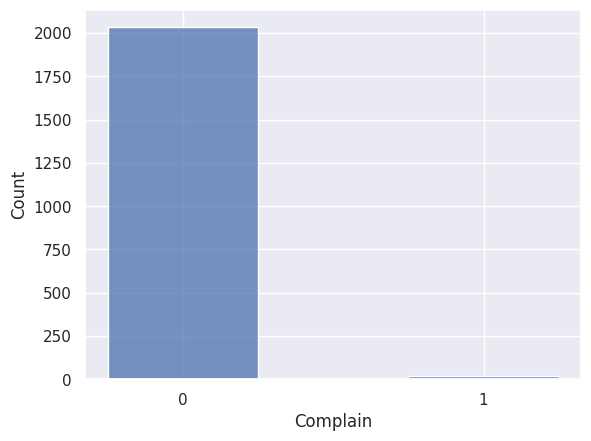

In [ ]:
sns.histplot(df["Complain"], shrink=0.5)

In [ ]:
print(
    f'Il y a {100 * df["Complain"].astype(int).sum() / len(df["Complain"]):.2f}% des individus qui se sont plaints.'
)

Il y a 0.97% des individus qui se sont plaints.


## Standardisation

### Modalités de variables catégoriques

<Axes: xlabel='Count', ylabel='Marital_Status'>

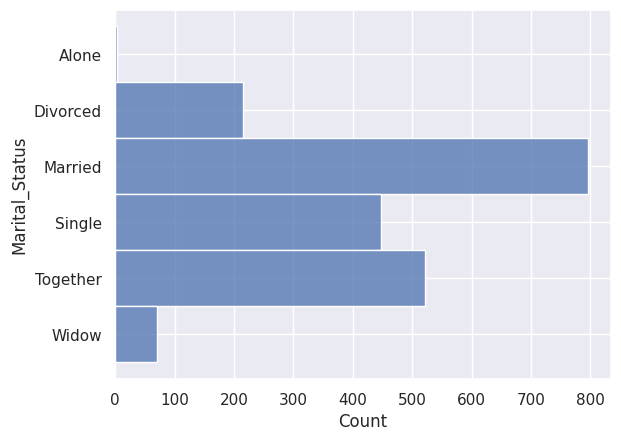

In [ ]:
sns.histplot(y=df["Marital_Status"])

Sans plus d'information, "Alone" est une autre formulation de "Single", on décide donc de remplacer "Alone" par "Single".

In [ ]:
df["Marital_Status"].replace("Alone", "Single", inplace=True)

<Axes: xlabel='Count', ylabel='Marital_Status'>

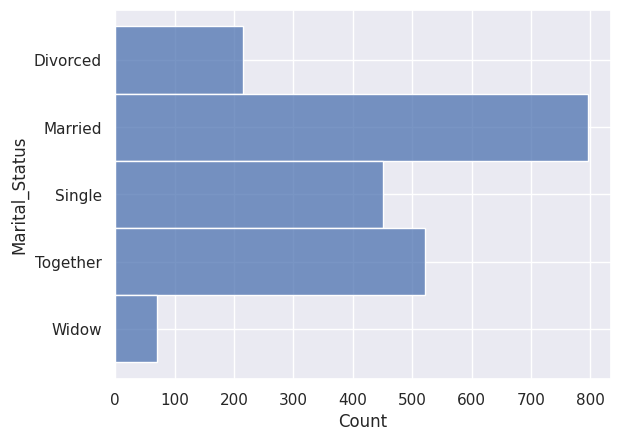

In [ ]:
sns.histplot(y=df["Marital_Status"])

## Valeurs extrêmes

### Income

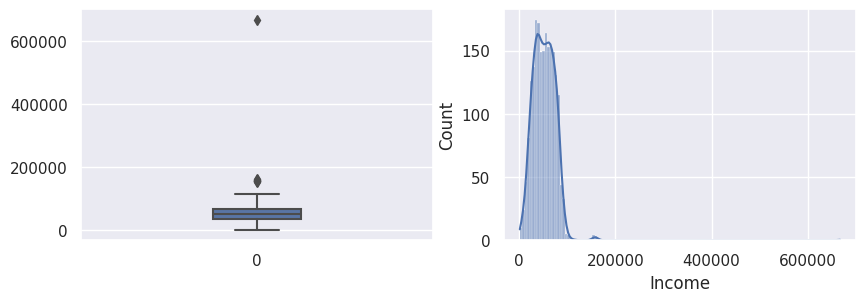

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

In [ ]:
# todo: texte pour commenter

In [ ]:
df["Income"][df["Income"] > 200_000]

ID
9432    666666.0
Name: Income, dtype: float64

Pour nous, il s'agit d'une valeur aberrante à supprimer du jeu de données car "666 666" ne semble pas être une valeur réelle (6 fois le nombre 6...).

In [ ]:
df.drop(index=df[df["Income"] > 200_000].index, inplace=True)

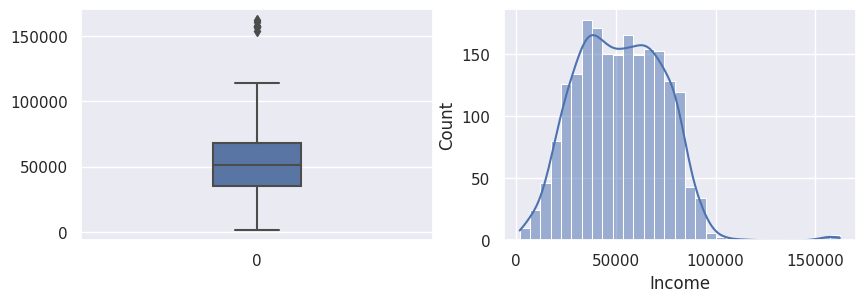

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

In [ ]:
# todo: est-ce qu'on retire les valeurs au-dessus de 120 000 ? comment on le justifie ?
# => ce serait plutôt des individus ATYPIQUES, à enlever mais garder de côté pour l'analyse a posteriori

In [ ]:
df.drop(index=df[df["Income"] > 120_000].index, inplace=True)

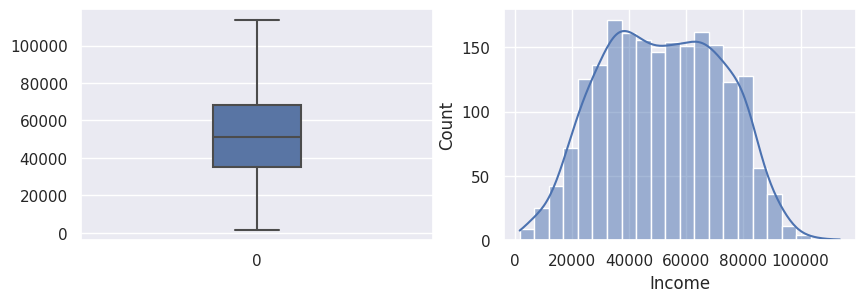

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Income"], width=0.25, ax=ax[0])
sns.histplot(df["Income"], kde=True, ax=ax[1])
plt.show()

### Year Date

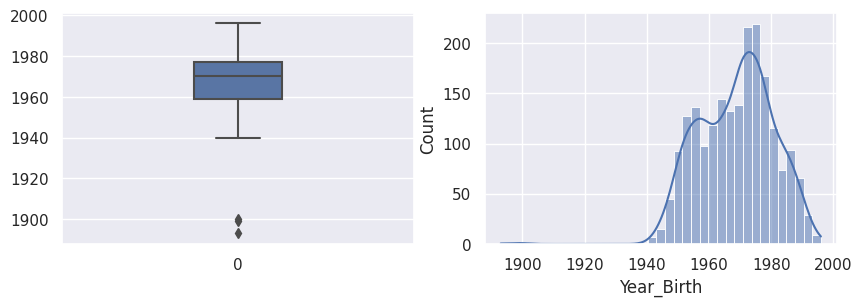

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Year_Birth"], width=0.25, ax=ax[0])
sns.histplot(df["Year_Birth"], kde=True, ax=ax[1])
plt.show()

In [ ]:
df[df["Year_Birth"] < 1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
ID,,,,,,,,,,,,,,,,,,,,,
7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,1,2,5,0,0,0,0,0,1,0
11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,...,0,2,4,0,0,0,0,0,0,0
1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,6,4,1,0,0,1,0,0,0,0


Comme les personnes les plus âgées au monde ont très rarement plus de 100 ans, et que nous sommes en 2023, on peut sans problème estimer que les trois dates de naissance avant 1920 sont erronées.

Pour les deux années 1893 et 1899, on peut s'imaginer que les personnes ont fait une faute de frappe, et voulaient écrire, respectivement, 1983 et 1989.

In [ ]:
df.loc[df["Year_Birth"] == 1893, "Year_Birth"] = 1983
df.loc[df["Year_Birth"] == 1899, "Year_Birth"] = 1989

Pour l'année 1900, il est difficile d'imaginer une faute de frappe, il s'agit peut-être de la valeur par défaut.
On peut tout simplement supprimer la ligne correspondante.

In [ ]:
df.drop(index=df.loc[df["Year_Birth"] == 1900, "Year_Birth"].index, inplace=True)

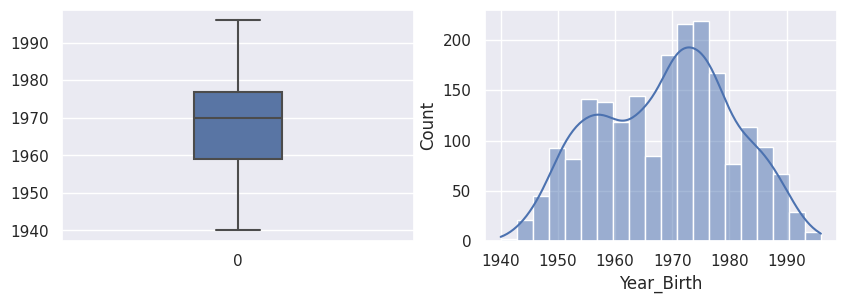

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df["Year_Birth"], width=0.25, ax=ax[0])
sns.histplot(df["Year_Birth"], kde=True, ax=ax[1])
plt.show()

## Valeurs manquantes

<Axes: ylabel='ID'>

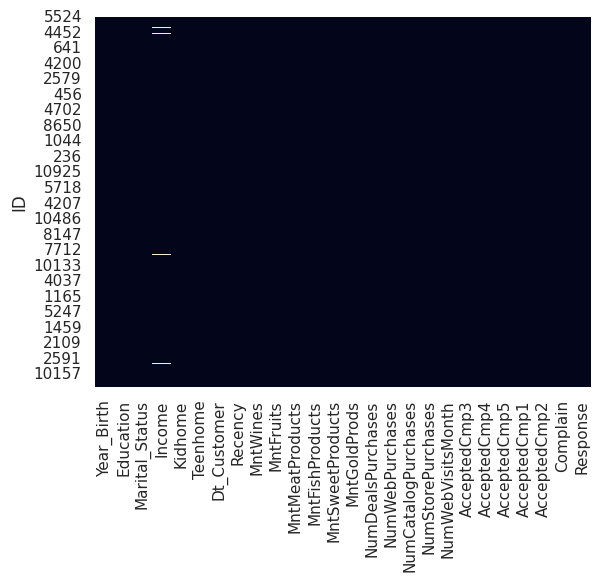

In [ ]:
sns.heatmap(
    df.isna(), cbar=False
)  # todo: mettre les graphiques à côté (horizontalement)

<seaborn.axisgrid.FacetGrid>

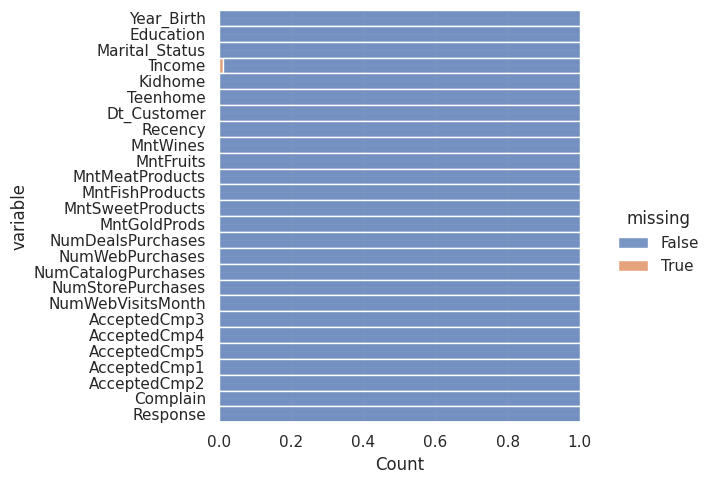

In [ ]:
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
)

<Axes: title={'center': 'Nombre de valeurs manquantes pour chaque variable'}>

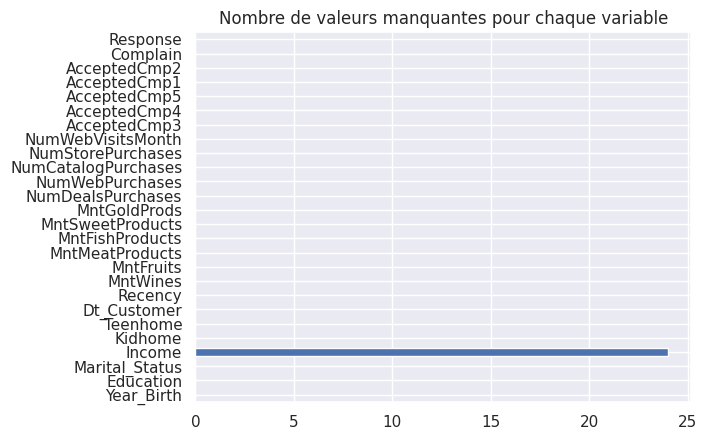

In [ ]:
plt.title("Nombre de valeurs manquantes pour chaque variable")
df.isna().sum().plot.barh()

In [ ]:
# todo : commenter

In [ ]:
# TODO: supprimer valeurs manquantes OU remplacer par la moyenne ?

In [ ]:
# todo: expliquer POURQUOI ces données sont manquantes (notre hypothèse du moins), et expliquer notre démarche en conséquence

### Remplacement par la moyenne

In [ ]:
df["Income"][df["Income"].isna()]

ID
1994    NaN
5255    NaN
7281    NaN
7244    NaN
8557    NaN
10629   NaN
8996    NaN
9235    NaN
5798    NaN
8268    NaN
1295    NaN
2437    NaN
2863    NaN
10475   NaN
2902    NaN
4345    NaN
3769    NaN
7187    NaN
1612    NaN
5079    NaN
10339   NaN
3117    NaN
5250    NaN
8720    NaN
Name: Income, dtype: float64

In [ ]:
df["Income"].fillna(df["Income"].mean(), inplace=True)

In [ ]:
# Vérification du bon remplacement des valeurs manquantes
df["Income"].isna().sum()

0

# Sauvegarde du Dataframe

In [ ]:
df.to_csv("data/data-cleaned.csv")